In [118]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from IPython.core.display import HTML 

data = pd.read_csv(r'C:\projects\Python\data\telecom_churn.csv')


In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
data.drop(['State', 'Voice mail plan'], axis = 1, inplace=True)

In [8]:
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,No,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,No,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,Yes,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,Yes,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [16]:
data['International plan'] = data['International plan'].replace(['Yes', 'No'], [1, 0])

In [17]:
data.head()

,Account length,Area code,International plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(8), int64(9)
memory usage

In [18]:
y = data['Churn'].astype('int')

In [20]:
X = data.drop('Churn', axis=1)

In [22]:
X.shape, y.shape

((3333, 17), (3333,))

# Выделяем отложенную выборку


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [31]:
X_train, X_valid,y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)

In [125]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2333, 17), (1000, 17), (2333,), (1000,))

## Первое дерево решений

In [33]:
first_tree = DecisionTreeClassifier(random_state=17)

## Применяем Кроссвалидацию и первый прогноз на отложенной выборке


In [34]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.91427061602227722

## Первая модель KNN(Метод ближайшего соседа)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
first_knn = KNeighborsClassifier()

In [37]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.86712740439845226

## Настраиваем max_depth и max_features для дерева


In [40]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': np.arange(1, 11), 
               'max_features':[.5, .7, 1.]}

tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)


In [41]:

%%time
tree_grid.fit(X_train, y_train);

Wall time: 8.86 s


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [0.5, 0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
tree_grid.best_score_, tree_grid.best_params_

(0.94170595799399914, {'max_depth': 6, 'max_features': 1.0})

## Настраиваем KNN

In [47]:
knn_params = {'n_neighbors': range(1, 100, 1) }#+ list(range(50, 100, 10))}

knn_grid = GridSearchCV(first_knn, knn_params, cv=5)



In [48]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 1min 24s


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [49]:
knn_grid.best_score_, knn_grid.best_params_

(0.87312473210458641, {'n_neighbors': 9})

## Делаем прогноз на отложенной выборке

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
tree_valid_pred = tree_grid.predict(X_valid)

In [52]:
accuracy_score(y_valid, tree_valid_pred)

0.94599999999999995

In [53]:
from sklearn.tree import export_graphviz

In [58]:
Best_tree = DecisionTreeClassifier(max_depth=6, max_features=1.0).fit(X_train, y_train)
Best_tree.score(X_valid, y_valid)

0.94599999999999995

In [127]:
export_graphviz(Best_tree, out_file='C:/projects/Python/mlcourse_open/Lesson3/telecom_tree33.dot',
               feature_names=X.columns, filled=True)

In [117]:
!dot -Tpng C:/projects/Python/mlcourse_open/Lesson3/telecom_tree.dot -o C:/projects/Python/mlcourse_open/Lesson3/telecom_tree.png


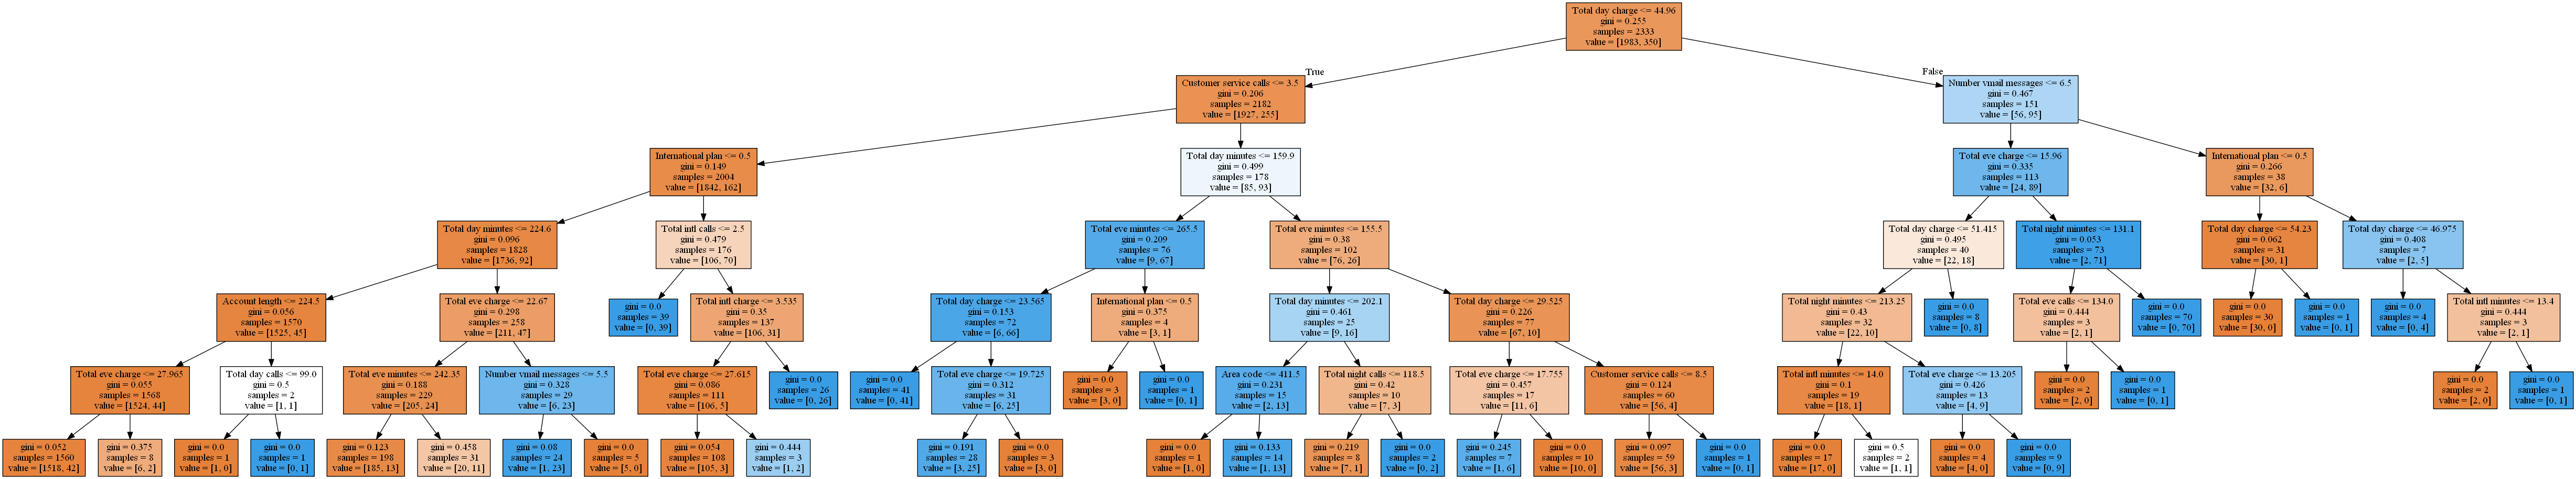

In [122]:
PATH = 'C:\projects\Python\mlcourse_open\Lesson3/'
Image(filename = PATH + "telecom_tree.png", width=2000, height=2000)